<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/ICP5/ICP5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import io
from google.colab import files
%matplotlib inline

In [2]:
data_file = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
for fn in data_file.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(data_file[fn])))

data_df = pd.read_csv(io.StringIO(data_file['winequality-red.csv'].decode('utf-8')))

User uploaded file "winequality-red.csv" with length 100951 bytes


In [4]:
data_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##Check if there is a null values in the data set

In [46]:
nulls = pd.DataFrame(data_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)


                      Null Count
Feature                         
quality                        0
alcohol                        0
sulphates                      0
pH                             0
density                        0
total sulfur dioxide           0
free sulfur dioxide            0
chlorides                      0
residual sugar                 0
citric acid                    0
volatile acidity               0
fixed acidity                  0


##find the top 3 most correlated features to the target label(quality)

In [20]:
 
numeric_features = data_df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['quality'].sort_values(ascending=False),'\n')




quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 



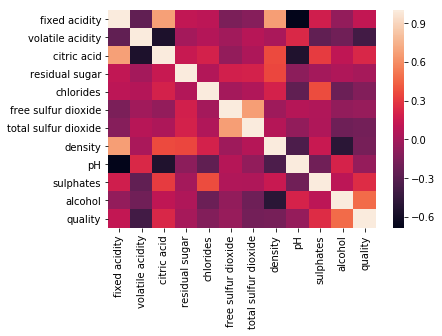

In [7]:
import seaborn as sns
corr = data_df.corr()
sns.heatmap(corr)

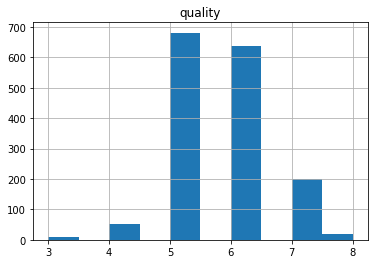

In [8]:
vis = data_df[['quality']]
vis.hist()
plt.show()

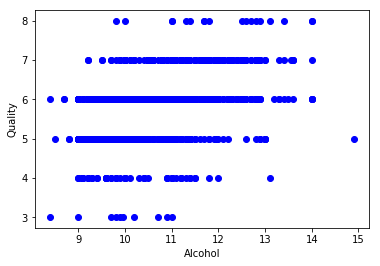

In [9]:
plt.scatter(data_df.alcohol, data_df.quality, color='blue')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

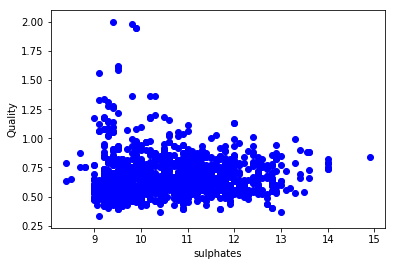

In [11]:
plt.scatter(data_df.alcohol, data_df.sulphates, color='blue')
plt.xlabel('sulphates')
plt.ylabel('Quality')
plt.show()

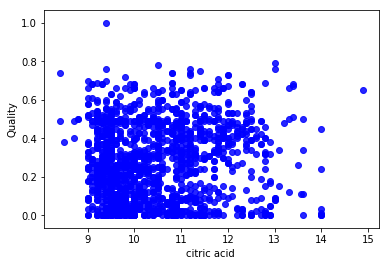

In [24]:
plt.scatter(data_df.alcohol, data_df[['citric acid']], color='blue', alpha=0.85)
plt.xlabel('citric acid ')
plt.ylabel('Quality')
plt.show()

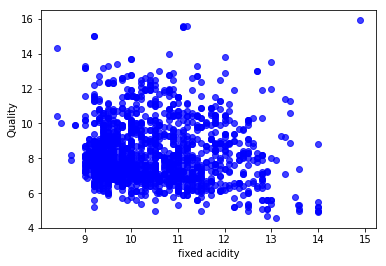

In [27]:
plt.scatter(data_df.alcohol, data_df[['fixed acidity']], color='blue', alpha=0.75)
plt.xlabel('fixed acidity')
plt.ylabel('Quality')
plt.show()

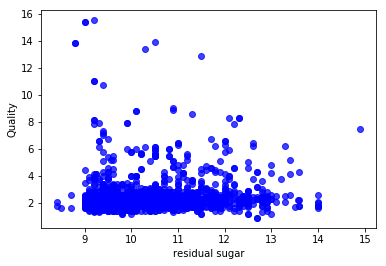

In [29]:
plt.scatter(data_df.alcohol, data_df[['residual sugar']], color='blue', alpha=0.75)
plt.xlabel('residual sugar')
plt.ylabel('Quality')
plt.show()

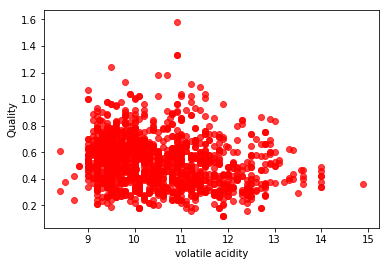

In [31]:
plt.scatter(data_df.alcohol, data_df[['volatile acidity']], color='red', alpha=0.75)
plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.show()

In [0]:

X = data_df.drop(['fixed acidity','free sulfur dioxide', 'pH', 'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity', 'residual sugar', 'quality'],axis=1)
Y = data_df['quality']

In [42]:
X.head(10)

,citric acid,sulphates,alcohol
0,0.00,0.56,9.4
1,0.00,0.68,9.8
2,0.04,0.65,9.8
3,0.56,0.58,9.8
4,0.00,0.56,9.4
5,0.00,0.56,9.4
6,0.06,0.46,9.4
7,0.00,0.47,10.0
8,0.02,0.57,9.5
9,0.36,0.80,10.5


##Split Data set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(len(X_train))

1279


##Modeling

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
mymodel = regr.fit(X_train, Y_train)
# The coefficients
coef_v = mymodel.coef_
print ('Coefficients: ', mymodel.coef_)
print ("R^2 is:", round(mymodel.score(X_test, Y_test), 2))

Coefficients:  [0.612774   0.80587237 0.32698538]
R^2 is: 0.27


##Evaluation Metrics and Prediction

In [45]:
Y_pred = mymodel.predict(X_test)

print("Residual sum of squares (MSE): %.2f" % np.mean((Y_pred - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mymodel.score(X_test, Y_test))

from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(Y_test, Y_pred))

Residual sum of squares (MSE): 0.52
Variance score: 0.27
RMSE is:  0.5159970959691138


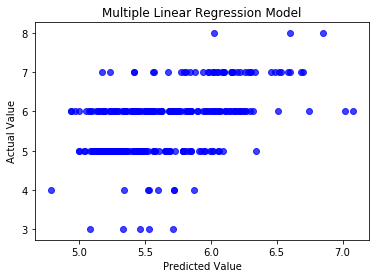

In [48]:
plt.scatter(Y_pred, Y_test, alpha=.75, color='blue',) #alpha helps to show overlapping data
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Multiple Linear Regression Model')
plt.show()